##Welcome to the Machine Learning Lab!
##Hey there, future ML engineer! 👋

####In this session, you’ll train your first AI music recommender just like music streaming platforms, but built by you.
####🎧 You’ll learn how machines find songs that “feel” alike using real audio features and a bit of math magic

Your First task:
1. Go to File in he top-left corner.
2. Click on "Save a copy in Drive".
3. You can now close this original tab and work in your own copy!

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the '-spotify-tracks-dataset' dataset.
Path to dataset files: /kaggle/input/-spotify-tracks-dataset


##Step 1: Importing required libraries


#####Link to Download Dataset - https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from google.colab import files
from PIL import Image

##Step 2: Upload dataset and load it into a pandas DataFrame

Key terms:

. (dot operator): Lets us access a function or attribute that belongs to a module, class, or object.
→ Example: In pd.read_csv(), the dot connects the module pd to its function read_csv().

pd: A short alias for the pandas library. It’s how we refer to pandas after writing import pandas as pd.

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
dataset = pd.read_csv(filename)
pd.set_option('display.max_columns', None)

Saving archive.zip to archive.zip


##Step 3: Lets View the Dataset!



In [ ]:
dataset

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


##Step 4: Inspect the dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
dataset.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


##Step 5: Select relevant columns for analysis and recommendation

In [ ]:
keep_cols = [
    "track_name",      # Song title (for display)
    "artists",         # Artist name(s) (for display)
    "track_genre",     # Genre (for filtering)
    "danceability",    # Audio feature
    "energy",          # Audio feature
    "valence",         # Audio feature (mood/happiness)
    "tempo",           # Audio feature
    "popularity",      # helps recommend popular songs
    "acousticness",    # improves similarity
    "instrumentalness",# improves similarity
    "speechiness",     # improves similarity
    "liveness"         # improves similarity
]

# Keep only the selected columns in the dataset
dataset = dataset[keep_cols]

##Step 6: Remove duplicates based on track_name + artists

In [ ]:
dataset = dataset.drop_duplicates(subset=["track_name", "artists"])

##Step 7: Drop rows with missing values


In [ ]:
dataset = dataset.dropna().reset_index(drop=True)

##Step 8: Scale Numeric audio features for clustering/similarity

In [ ]:
features = ["danceability", "energy", "valence", "tempo",
            "acousticness", "instrumentalness", "speechiness", "liveness"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset[features])

##Step 9: Apply weights to scaled audio features

We can change how much each audio feature affects the recommendations by giving it a “weight.”

Higher numbers make that feature more important, and lower numbers make it less important.

If all weights are equal, the recommender treats every feature equally — giving balanced results.

But we can make them unequal to create different moods:

🎉 Party vibes → increase danceability, energy, and valence

☁️ Chill mood → increase acousticness, lower energy

🎧 Focus mode → increase instrumentalness, lower speechiness

Adjusting these weights lets you “tune” the recommender’s personality.

In [ ]:
weights = [1.5, 1.5, 1, 1, 1, 1, 0.8, 0.5]
X_scaled_weighted = X_scaled * weights

##Step 10: Perform KMeans clustering on weighted features

Now we group similar songs together using K-Means clustering.

Each cluster is like a group of songs that sound similar, even if they’re not the same official genre.

What makes them similar are their audio features; things like danceability, energy, tempo, and valence (how happy or sad a song feels).

K-Means looks at these numbers and groups songs that have similar patterns in those features.

In [ ]:
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
dataset["cluster"] = kmeans.fit_predict(X_scaled_weighted)

##Step 11: Visualize clusters using PCA (2D projection)

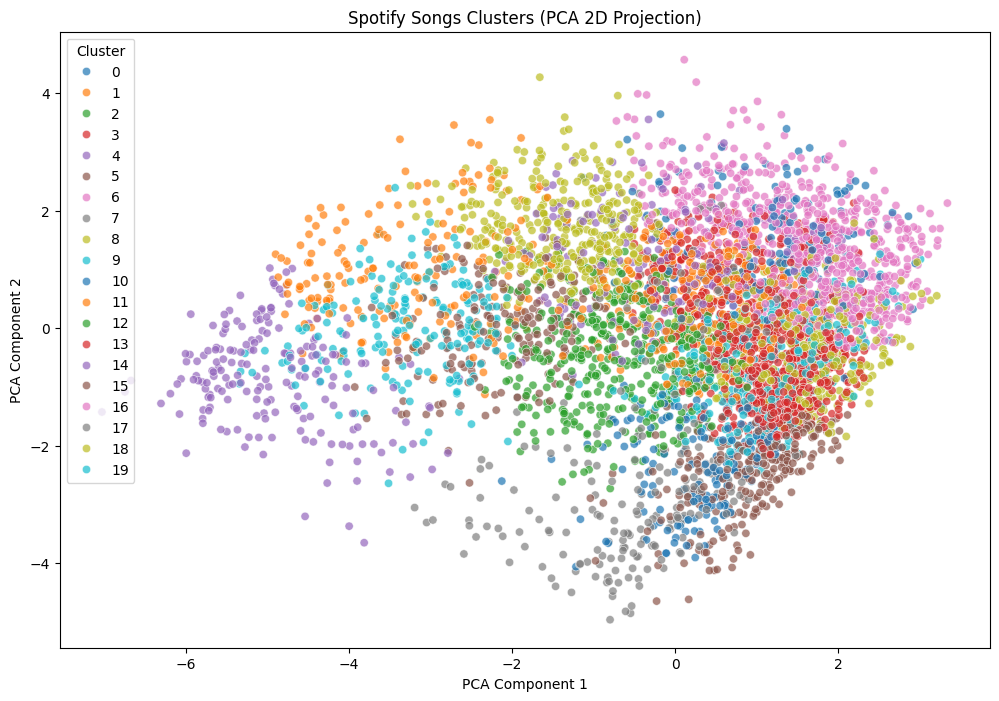

In [ ]:

#Reduce weighted features to 2 principal components for plotting
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_weighted)
dataset['pca1'] = X_pca[:, 0]
dataset['pca2'] = X_pca[:
                        , 1]

# Scatter plot of clusters (sampled for faster plotting)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=dataset.sample(5000, random_state=42),
    x='pca1',
    y='pca2',
    hue='cluster',
    palette='tab10',
    alpha=0.7
)
plt.title("Spotify Songs Clusters (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

##Step 12: Song recommendation function

###🧠 How the recommend() function works

1. Lowercases text so song/artist matches aren’t case-sensitive.

2. Checks if the song exists → if not, shows an error.

3. Finds the song’s row (index) in the dataset.

4. Gets its genre and cluster label to find songs with a similar vibe.

5. Selects candidates from the same cluster + genre (or just genre if few exist).

6. Calculates similarity between the chosen song and all candidates using cosine similarity.

7. Sorts and returns the top N most similar songs with their similarity scores.

In [ ]:
dataset['track_name'] = dataset['track_name'].str.lower()
dataset['artists'] = dataset['artists'].str.lower()

def recommend(song_name, artist_name, n_recommendations=5):
    # Check if the song exists
    if not ((dataset['track_name'] == song_name) & (dataset['artists'] == artist_name)).any():
        return f"❌ Song '{song_name}' by '{artist_name}' not found."

    # Find index of the given song
    idx = dataset[(dataset['track_name'] == song_name) & (dataset['artists'] == artist_name)].index[0] #idx is the index of the song the user picked
    genre = dataset.loc[idx, "track_genre"] #retrives the genre of the song
    cluster_label = dataset.loc[idx, "cluster"] #retrives the cluster of the song

    # Get songs from the same genre and cluster from our data set
    cluster_songs = dataset[
        (dataset["track_genre"] == genre) &
        (dataset["cluster"] == cluster_label)
    ]

    # If too few songs in cluster, broaden search to only genre
    if len(cluster_songs) < 2:
        cluster_songs = dataset[dataset["track_genre"] == genre]

    # Compute similarity
    # 🎯 Select the row numbers of all songs in the same genre and cluster
    # We take their numerical feature vectors (like energy, tempo, etc.)
    cluster_X = X_scaled_weighted[cluster_songs.index]

    # 💡 Compute cosine similarity between the selected song and every song in this cluster
    # This gives us a similarity score for each song  higher means more similar in sound and mood.
    sim_scores = cosine_similarity([X_scaled_weighted[idx]], cluster_X)[0]

    # 🔢 Sort songs by similarity and get the top matches
    # argsort() ranks the indices from least to most similar, [::-1] reverses it,
    # and we skip the first one (the song itself) to get top recommendations.
    sim_indices = sim_scores.argsort()[::-1][1:n_recommendations+1]

    # Build recommendations DataFrame
    # 🧾 This section creates the final results table showing:
    # - the most similar songs (by name and artist),
    # - their similarity scores,
    # - neatly sorted from most → least similar.
    recommendations = cluster_songs.iloc[sim_indices][["track_name", "artists"]].copy() #A small DataFrame of recommended songs and their artists
    recommendations["similarity"] = sim_scores[sim_indices]
    recommendations = recommendations.sort_values(by="similarity", ascending=False).reset_index(drop=True)

    return recommendations


##Step 13: Final Test: Let's see it in action!

Try entering any song name and artist from the dataset.


In [ ]:
print("🎵 Recommended Songs:")
recommend("hymn for the weekend", "coldplay", 5)

🎵 Recommended Songs:


,track_name,artists,similarity
0,only thing i ever get for christmas,justin bieber,0.838772
1,ishq sufiyana (male),kamal khan,0.832830
2,west coast,lana del rey,0.765835
3,in the stars,benson boone,0.759185
4,ek tarfa,darshan raval,0.742185


# Congrats! You’ve officially built your own Spotify-style recommendation system! 🚀

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
#🧠 Activity: Understanding Cosine Similarity

In this activity, we’ll test cosine similarity using two random images.
This helps us visualize how machine learning compares data mathematically by looking at patterns of numbers, not the actual shapes or objects.

- We load two images using Image.open() and convert them to RGB, so each pixel has three color values: red, green, and blue.

- Then we use np.array(), a function from the NumPy library we imported, to turn each image into a 3D matrix of numbers where the dimensions represent height, width, and RGB layers.

- Each image is made up of RGB values — red, green, and blue.
These three layers combine to form the full picture, and every pixel has three numbers that represent how strong each color is.
For example, [255, 0, 0] means full red, no green, no blue.

- We resize the images to (100, 100) so they have the same shape for comparison.

- We flatten each image into a single long vector basically a one-dimensional list of numbers that cosine similarity can compare.

- We divide all pixel values by 255 to normalize them between 0 and 1 (since each RGB value originally ranges from 0–255).

- Finally, we use the cosine_similarity() function to measure how similar both image vectors are.

A value closer to 1 means the images are very similar, while a value closer to 0 means they’re completely different.



In [ ]:
imgA = np.array(Image.open("cat.jpg").convert("RGB").resize((100,100)))
imgB = np.array(Image.open("car.jpg").convert("RGB").resize((100,100)))

vectors = {
  "cat.jpg": imgA.flatten()/255.0,
  "tiger.jpg": imgB.flatten()/255.0
}

print(cosine_similarity([vectors["cat.jpg"]], [vectors["tiger.jpg"]])[0][0])

0.6824245574902605


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------